# Status + LTD

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import lines
import pandas as pd
import scipy.special
from pathlib import Path
from statsmodels.graphics.tsaplots import plot_acf

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

from analyze_simulations_funs import *

In [2]:
outputs_dir_test = Path("../../outputs/LtdStatus/outputs/test")
outputs_dir = Path("../../outputs/LtdStatus/outputs/change_q")
# outputs_dir_new = Path("../../outputs/LtdStatus/outputs/n100")

# Phase transition details

/tmp/ipykernel_260514/1355872723.py:44: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Text(0, 0.5, '$\\sin (\\theta)$')

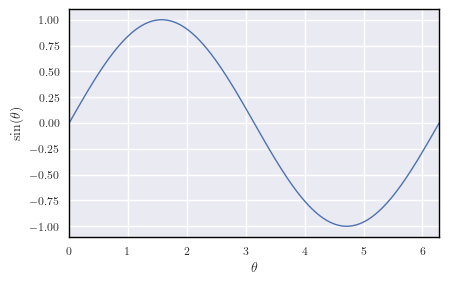

In [3]:
def set_size(width, fraction=1, subplots=(1, 1)):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float or string
            Document width in points, or string of predined document type
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    if width == 'thesis':
        width_pt = 426.79135
    elif width == 'beamer':
        width_pt = 307.28987
    else:
        width_pt = width

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)

import numpy as np
import matplotlib.pyplot as plt

# Using seaborn's style
plt.style.use('seaborn')
width = 345
# width = 1000

tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 10,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8
}

plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
plt.rcParams.update(tex_fonts)
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.markersize'] = 4

x = np.linspace(0, 2*np.pi, 100)
# Initialise figure instance
fig, ax = plt.subplots(1, 1, figsize=set_size(width))
# Plot
ax.plot(x, np.sin(x))
ax.set_xlim(0, 2 * np.pi)
ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$\sin (\theta)$')



In [4]:
figsize = set_size(width)
# figsize = (figsize[0] * 1.7, figsize[1])

In [5]:
get_quasi_rho(0.9, 0.2, 0.5)

0.6249999999999999

start 0.49
1.9799979587628191
0.6644734720002414
start 0.51
0.6689191518946307
2.0200019611650992


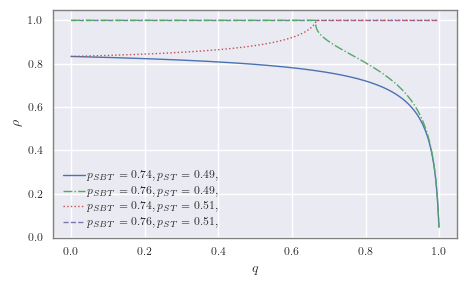

In [24]:
which_version = 2
errors = True
save_ = True

fig, axs = plt.subplots(1, 1, figsize=figsize, sharey=True)

# qs = [0.1, 0.5, 0.8]
pbs2 = [0.74,0.76]
phs = [0.49, 0.51]
# phs = [0.45, 0.5, 0.55]

# pbs = np.arange(0,1,0.001)
qs2 = np.arange(0,1,0.001)

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
# markers = ["v", "x", "o"]
lstyles = ["-", "-.", ":", "--"]
zorders = [2, 3, 4, 1]

ax = axs
line = -1
# for i, (ax, ph) in enumerate(zip(axs, phs)):
for i, ph in enumerate(phs):
    print("start " + str(ph))
    for j, pb in enumerate( pbs2):
        line += 1
        # if line == 1:
        #     continue
        "Get anal line"
        qs2_here = np.array(qs2)
        rho_qs = np.array([get_quasi_rho(pb, ph, q) for q in qs2])
        rho_exp = np.array([rho for rho in rho_qs])
        inds = np.isnan(rho_qs)
        "Changing last True to False to break continuous lines in the case of discontinuous jumps."
        # print(inds)
        if len(np.where(inds)[0]) > 0:
            inds[np.where(inds)[0][-1]] = False
        rho_exp[inds] = 1
        
        # if line == 2:
        #     line = 2/0
        
        qc = get_q_crit(pb, ph)
        print(qc)
        rhoc = get_rho_crit(qc, ph)
        
        if (qc <= 1) & (qc >= 0):
            if (rhoc <= 1) & (rhoc >= 0):
                if not (qc in qs2):
                    rho_exp = np.insert(rho_exp, np.where(qs2 > qc)[0][0], rhoc)
                    qs2_here = np.insert(qs2, np.where(qs2 > qc)[0][0], qc)
                    
        # "Add value in rho=1, when the transition is continuous."
        # pb_rho_is_1 = get_pb_when_rho_eq_1(q, ph)
        # rho_rho_is_1_exp = get_quasi_rho(pb_rho_is_1, ph, q)
        # # print(pb_rho_is_1, rho_rho_is_1_exp)
        # if (pb_rho_is_1 >= 0) & (pb_rho_is_1 <= 1):
        #     rhos = get_rhos(pb_rho_is_1, ph, q)
        #     if np.isnan(rho_rho_is_1_exp):
        #         rho_rho_is_1_exp = rhos[0]
        #     # print(rhos)
        #     # print(rho_rho_is_1_exp)
        #     if np.abs(rho_rho_is_1_exp - 1) < 10**-10:
        #         "If unstable solution is closer, we don't care"
        #         if not (pb_rho_is_1 in pbs_here):
        #             # print(i, j)
        #             rho_exp = np.insert(rho_exp, np.where(pbs_here > pb_rho_is_1)[0][0], 1)
        #             pbs_here = np.insert(pbs_here, np.where(pbs_here > pb_rho_is_1)[0][0], pb_rho_is_1)
        
        # "Get sim vals"
        # rows = (df2_g.q == q) & ( df2_g.ps == ph)
        # inds = np.where(rows)[0]
        # xvals = [row.p for i, (index, row) in enumerate(df2_g.iterrows()) if i in inds]
        # yvals1 = np.array([row.level for i, (index, row) in enumerate(df2_g.iterrows()) if i in inds])
        # yvals1[np.isnan(yvals1)] = 1
        # yerr1 = np.array([row.level_std for i, (index, row) in enumerate(df2_g.iterrows()) if i in inds])
        # yvals2 = np.array([row.level2 for i, (index, row) in enumerate(df2_g.iterrows()) if i in inds])
        # yvals2[np.isnan(yvals2)] = 1
        # yerr2 = np.array([row.level2_std for i, (index, row) in enumerate(df2_g.iterrows()) if i in inds])
        
        label = r"$p_{{SBT}}={pb},p_{{ST}}={ph},$".format(pb=pb,ph=ph)
        ax.plot(qs2_here, rho_exp, lstyles[line], 
                color = colors[line],label=label, zorder = zorders[line])#'_nolegend_')
        
        # if which_version == 1:
        #     yvals = yvals1
        #     yerr = yerr1
            
        # else:
        #     yvals = yvals2
        #     yerr = yerr2
        
        # yerr[yerr < 0.01] = np.NaN
        # yerr = list(yerr)
        
        
        # if j in [0,2]:
        #     if errors:
        #         (plotline, caplines, _) = ax.errorbar(xvals, yvals, yerr = yerr, linestyle = '', color = colors[j], marker=markers[j], label = label, elinewidth=0.5, ecolor = "k", capsize=2)
        #         plotline.set_markerfacecolor('none')
        #         plotline.set_markeredgewidth(0.5)
        #         for cap in caplines:
        #             cap.set_markeredgewidth(0.1)
        #     else:
        #         ax.scatter(xvals, yvals, color = colors[j], marker=markers[j], facecolors='none', label = label)
        # else:
        #     if errors:
        #         (plotline, caplines, _) = ax.errorbar(xvals, yvals, yerr = yerr, linestyle = '', color = colors[j], marker=markers[j], label = label, elinewidth=0.5, ecolor = "k", capsize=2)
        #         plotline.set_markeredgewidth(0.5)
        #         for cap in caplines:
        #             cap.set_markeredgewidth(0.1)
        #     else:
        #         ax.scatter(xvals, yvals, color = colors[j], marker=markers[j], label = label)
        
    ax.spines['bottom'].set_color('0.5')
    ax.spines['top'].set_color('0.5')
    ax.spines['right'].set_color('0.5')
    ax.spines['left'].set_color('0.5')
    # if i == 0:
    ax.set_ylabel(r'$\rho$')
    # elif i==2:
    ax.legend(handletextpad=0.1)
    # elif i==1:
    ax.set_xlabel(r'$q$')
    
    # ax.set_ylim([0.15, 1.05])
    # ax.set_title(r'$p_H={ph}$'.format(ph=ph))
        
# fig.supxlabel(r'$p$')

# Save and remove excess whitespace
fig.tight_layout()
if save_:
    fig.savefig('change_q5' + '.pdf', format='pdf', bbox_inches='tight') 


start 0.1
nan
2.0000000000000004
start 0.76
nan
0.7547169811320754


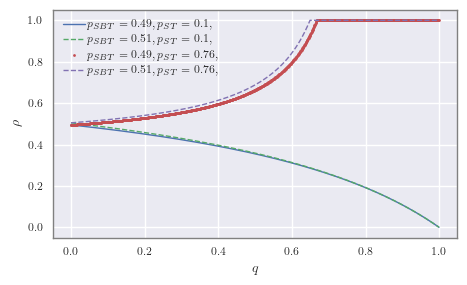

In [12]:
which_version = 2
errors = True
save_ = False

fig, axs = plt.subplots(1, 1, figsize=figsize, sharey=True)

# qs = [0.1, 0.5, 0.8]
pbs2 = [0.49,0.51]
phs = [0.1, 0.76]
# phs = [0.45, 0.5, 0.55]

# pbs = np.arange(0,1,0.001)
qs2 = np.arange(0,1,0.001)

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
# markers = ["v", "x", "o"]
lstyles = ["-", "--", ".", "--"]

ax = axs
line = -1
# for i, (ax, ph) in enumerate(zip(axs, phs)):
for i, ph in enumerate(phs):
    print("start " + str(ph))
    for j, pb in enumerate( pbs2):
        line += 1
        # if line == 1:
        #     continue
        "Get anal line"
        qs2_here = np.array(qs2)
        rho_qs = np.array([get_quasi_rho(pb, ph, q) for q in qs2])
        rho_exp = np.array([rho for rho in rho_qs])
        inds = np.isnan(rho_qs)
        "Changing last True to False to break continuous lines in the case of discontinuous jumps."
        # print(inds)
        if len(np.where(inds)[0]) > 0:
            inds[np.where(inds)[0][-1]] = False
        rho_exp[inds] = 1
        
        # if line == 2:
        #     line = 2/0
        
        qc = get_q_crit(pb, ph)
        print(qc)
        rhoc = get_rho_crit(qc, ph)
        
        if (qc <= 1) & (qc >= 0):
            if (rhoc <= 1) & (rhoc >= 0):
                if not (qc in qs2):
                    rho_exp = np.insert(rho_exp, np.where(qs2 > qc)[0][0], rhoc)
                    qs2_here = np.insert(qs2, np.where(qs2 > qc)[0][0], qc)
                    
        # "Add value in rho=1, when the transition is continuous."
        # pb_rho_is_1 = get_pb_when_rho_eq_1(q, ph)
        # rho_rho_is_1_exp = get_quasi_rho(pb_rho_is_1, ph, q)
        # # print(pb_rho_is_1, rho_rho_is_1_exp)
        # if (pb_rho_is_1 >= 0) & (pb_rho_is_1 <= 1):
        #     rhos = get_rhos(pb_rho_is_1, ph, q)
        #     if np.isnan(rho_rho_is_1_exp):
        #         rho_rho_is_1_exp = rhos[0]
        #     # print(rhos)
        #     # print(rho_rho_is_1_exp)
        #     if np.abs(rho_rho_is_1_exp - 1) < 10**-10:
        #         "If unstable solution is closer, we don't care"
        #         if not (pb_rho_is_1 in pbs_here):
        #             # print(i, j)
        #             rho_exp = np.insert(rho_exp, np.where(pbs_here > pb_rho_is_1)[0][0], 1)
        #             pbs_here = np.insert(pbs_here, np.where(pbs_here > pb_rho_is_1)[0][0], pb_rho_is_1)
        
        # "Get sim vals"
        # rows = (df2_g.q == q) & ( df2_g.ps == ph)
        # inds = np.where(rows)[0]
        # xvals = [row.p for i, (index, row) in enumerate(df2_g.iterrows()) if i in inds]
        # yvals1 = np.array([row.level for i, (index, row) in enumerate(df2_g.iterrows()) if i in inds])
        # yvals1[np.isnan(yvals1)] = 1
        # yerr1 = np.array([row.level_std for i, (index, row) in enumerate(df2_g.iterrows()) if i in inds])
        # yvals2 = np.array([row.level2 for i, (index, row) in enumerate(df2_g.iterrows()) if i in inds])
        # yvals2[np.isnan(yvals2)] = 1
        # yerr2 = np.array([row.level2_std for i, (index, row) in enumerate(df2_g.iterrows()) if i in inds])
        
        label = r"$p_{{SBT}}={pb},p_{{ST}}={ph},$".format(pb=pb,ph=ph)
        ax.plot(qs2_here, rho_exp, lstyles[line], color = colors[line],label=label)#'_nolegend_')
        
        # if which_version == 1:
        #     yvals = yvals1
        #     yerr = yerr1
            
        # else:
        #     yvals = yvals2
        #     yerr = yerr2
        
        # yerr[yerr < 0.01] = np.NaN
        # yerr = list(yerr)
        
        
        # if j in [0,2]:
        #     if errors:
        #         (plotline, caplines, _) = ax.errorbar(xvals, yvals, yerr = yerr, linestyle = '', color = colors[j], marker=markers[j], label = label, elinewidth=0.5, ecolor = "k", capsize=2)
        #         plotline.set_markerfacecolor('none')
        #         plotline.set_markeredgewidth(0.5)
        #         for cap in caplines:
        #             cap.set_markeredgewidth(0.1)
        #     else:
        #         ax.scatter(xvals, yvals, color = colors[j], marker=markers[j], facecolors='none', label = label)
        # else:
        #     if errors:
        #         (plotline, caplines, _) = ax.errorbar(xvals, yvals, yerr = yerr, linestyle = '', color = colors[j], marker=markers[j], label = label, elinewidth=0.5, ecolor = "k", capsize=2)
        #         plotline.set_markeredgewidth(0.5)
        #         for cap in caplines:
        #             cap.set_markeredgewidth(0.1)
        #     else:
        #         ax.scatter(xvals, yvals, color = colors[j], marker=markers[j], label = label)
        
    ax.spines['bottom'].set_color('0.5')
    ax.spines['top'].set_color('0.5')
    ax.spines['right'].set_color('0.5')
    ax.spines['left'].set_color('0.5')
    # if i == 0:
    ax.set_ylabel(r'$\rho$')
    # elif i==2:
    ax.legend(handletextpad=0.1)
    # elif i==1:
    ax.set_xlabel(r'$q$')
    
    # ax.set_ylim([0.15, 1.05])
    # ax.set_title(r'$p_H={ph}$'.format(ph=ph))
        
# fig.supxlabel(r'$p$')

# Save and remove excess whitespace
fig.tight_layout()
if save_:
    fig.savefig('change_q4' + '.pdf', format='pdf', bbox_inches='tight') 


## Process data

In [7]:
# df, rho_inits = process_folder(outputs_dir_test)
df_rho, df_files, last_file_processed = process_folder(outputs_dir, no_triad_stats=True, max_num_rows = 20000)
print(len(df_rho))
df_wrho_copy = df_rho.copy(deep=True)
# df_wrho = df_wrho[df_wrho.rho_init >= 0]
# df_wrho = df_wrho.reset_index(drop=True)
df_rho

10100


,index,q,p,ps,rho_init,steps,cur_steps,rho,Lplus
0,0,0.00,0.1,0.2,0.5,400,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.49313131313131314, 0.4036363636363636, 0.38...","[4882.0, 3996.0, 3837.0, 3844.0, 3786.0, 3799...."
1,1,0.00,0.1,0.2,0.5,400,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.5005050505050505, 0.3996969696969697, 0.381...","[4955.0, 3957.0, 3777.0, 3791.0, 3811.0, 3709...."
2,2,0.00,0.1,0.2,0.5,400,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.501010101010101, 0.40424242424242424, 0.386...","[4960.0, 4002.0, 3824.0, 3750.0, 3808.0, 3721...."
3,3,0.00,0.1,0.2,0.5,400,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.5053535353535353, 0.3997979797979798, 0.384...","[5003.0, 3958.0, 3808.0, 3791.0, 3846.0, 3787...."
4,4,0.00,0.1,0.2,0.5,400,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.49464646464646467, 0.4003030303030303, 0.37...","[4897.0, 3963.0, 3732.0, 3777.0, 3792.0, 3812...."
...,...,...,...,...,...,...,...,...,...
10095,95,0.65,0.2,0.8,0.5,400,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.49676767676767675, 0.5356565656565656, 0.55...","[4918.0, 5303.0, 5525.0, 5707.0, 5799.0, 5850...."
10096,96,0.65,0.2,0.8,0.5,400,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.5073737373737374, 0.5487878787878788, 0.567...","[5023.0, 5433.0, 5616.0, 5768.0, 5792.0, 5821...."
10097,97,0.65,0.2,0.8,0.5,400,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.4998989898989899, 0.5286868686868686, 0.558...","[4949.0, 5234.0, 5534.0, 5665.0, 5758.0, 5796...."
10098,98,0.65,0.2,0.8,0.5,400,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.4954545454545455, 0.5309090909090909, 0.558...","[4905.0, 5256.0, 5528.0, 5694.0, 5721.0, 5795...."


In [7]:
df_rho_g = group_results(df_rho, ['q', 'p', 'ps', 'rho_init'])
df_rho_g

NameError: name 'df_rho' is not defined

In [9]:
rho_univals = np.unique([rho for rhos in df_rho.rho for rho in rhos])
len(rho_univals), min(rho_univals), max(rho_univals)

(9198, 0.0, 1.0)

In [57]:
L = 100*99
vals = np.arange(min(rho_univals),max(rho_univals)+1/L,1/L)

np.max([np.min(np.abs(vals - val)) for val in rho_univals])

3.3306690738754696e-15

## Finding quasi-stationary level

In [ ]:
try:
    path = Path(outputs_dir, "qs_levels3.h5")
    df2_rho = pd.read_hdf(path, key = "df2_rho")
    # save_df2_s2000 = False
except FileNotFoundError:
    print("FileNotFoundError")
    df2_rho = get_quasilevels2(df_rho, calc_triads=False)
    # save_df2_s2000 = True
    
    df2_rho.reset_index(drop = True, inplace = True)
    
    path = Path(outputs_dir, "qs_levels3.h5")
    df2_rho.to_hdf(path, key = 'df2_rho', mode ="w")
print(len(df2_rho))
df2_rho.head(5)
    

In [8]:
try:
    path = Path(outputs_dir, "qs_grouped.h5")
    df2_rho_g = pd.read_hdf(path, key = "df2_rho_g")
    # save_df2_s2000 = False
except FileNotFoundError:
    print("FileNotFoundError")
    # df2_rho = get_quasilevels2(df_rho, calc_triads=False)
    # # save_df2_s2000 = True
    
    # df2_rho.reset_index(drop = True, inplace = True)
    
    # path = Path(outputs_dir, "qs_levels3.h5")
    # df2_rho.to_hdf(path, key = 'df2_rho', mode ="w")
print(len(df2_rho_g))
df2_rho_g.head(5)
    

101


q    p   ps  rho_init  repetitions   rho_lvl  rho_lvl_std  \
0.0 0.1 0.2 0.5  0.0  0.1  0.2       0.5          100  0.382587     0.000309   
        0.8 0.5  0.0  0.1  0.8       0.5          100  0.382587     0.000309   
    0.2 0.2 0.5  0.0  0.2  0.2       0.5          100  0.402445     0.000282   
        0.8 0.5  0.0  0.2  0.8       0.5          100  0.402445     0.000282   
    0.8 0.2 0.5  0.0  0.8  0.2       0.5          100       NaN          NaN   

                 rho_lvl_valid  rho_sim_std  rho_lvl2  ...  rho_sim_std2  \
0.0 0.1 0.2 0.5            100     0.000036  0.382791  ...      0.000060   
        0.8 0.5            100     0.000036  0.382791  ...      0.000060   
    0.2 0.2 0.5            100     0.000038  0.402674  ...      0.000054   
        0.8 0.5            100     0.000038  0.402674  ...      0.000054   
    0.8 0.2 0.5              0          NaN       NaN  ...           NaN   

                 rho_lvl3  rho_lvl3_std  rho_lvl3_valid  rho_sim_std3  \
0.0 0.1 0.2 0.5  0.382590      0.000315             100      0.000036   
        0.8 0.5  0.382590      0.000315             100      0.000036   
    0.2 0.2 0.5  0.402447      0.000278             100      0.000038   
        0.8 0.5  0.402447      0.000278             100      0.000038   
    0.8 0.2 0.5       NaN           NaN               0           NaN   

                 rho_lvl_exp  rho_lvl4  rho_lvl4_std  rho_lvl4_valid  \
0.0 0.1 0.2 0.5     0.382782  0.382580      0.000306             100   
        0.8 0.5     0.382782  0.382580      0.000306             100   
    0.2 0.2 0.5     0.402700  0.402443      0.000277             100   
        0.8 0.5     0.402700  0.402443      0.000277             100   
    0.8 0.2 0.5          NaN       NaN           NaN               0   

                 rho_sim_std4  
0.0 0.1 0.2 0.5      0.000036  
        0.8 0.5      0.000036  
    0.2 0.2 0.5      0.000038  
        0.8 0.5      0.000038  
    0.8 0.2 0.5           NaN  

[5 rows x 22 columns]

In [12]:
figsize = set_size(width)
# figsize = (figsize[0] * 1.7, figsize[1])

start 0.2
nan
0.4689429556574725
start 0.8
nan
-7.549703546891171
start 0.2
start 0.8


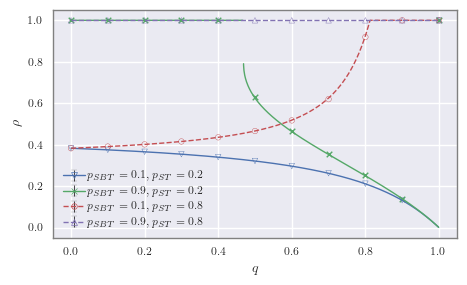

In [21]:
which_version = 2
errors = True
save_ = True

which_error = "lvl" # "sim" or "lvl"

fig, axs = plt.subplots(1, 1, figsize=figsize, sharey=True)

# qs = [0.1, 0.5, 0.8]
pbs2 = [0.1,0.9]
phs = [0.2, 0.8]

# pbs = np.arange(0,1,0.001)
qs2 = np.arange(0,1,0.001)

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
markers = ["v", "x", "o", "^"]
lstyles = ["-", "--"]

ax = axs
line = -1
# for i, (ax, ph) in enumerate(zip(axs, phs)):
for i, ph in enumerate(phs):
    print("start " + str(ph))
    for j, pb in enumerate( pbs2):
        line += 1
        # if line == 1:
        #     continue
        "Get anal line"
        qs2_here = np.array(qs2)
        rho_qs = np.array([get_quasi_rho(pb, ph, q) for q in qs2])
        rho_exp = np.array([rho for rho in rho_qs])
        inds = np.isnan(rho_qs)
        "Changing last True to False to break continuous lines in the case of discontinuous jumps."
        # print(inds)
        if len(np.where(inds)[0]) > 0:
            inds[np.where(inds)[0][-1]] = False
        rho_exp[inds] = 1
        
        # if line == 2:
        #     line = 2/0
        
        qc = get_q_crit(pb, ph)
        print(qc)
        rhoc = get_rho_crit(qc, ph)
        
        if (qc <= 1) & (qc >= 0):
            if (rhoc <= 1) & (rhoc >= 0):
                if not (qc in qs2):
                    rho_exp = np.insert(rho_exp, np.where(qs2 > qc)[0][0], rhoc)
                    qs2_here = np.insert(qs2, np.where(qs2 > qc)[0][0], qc)
                    
        # "Add value in rho=1, when the transition is continuous."
        # pb_rho_is_1 = get_pb_when_rho_eq_1(q, ph)
        # rho_rho_is_1_exp = get_quasi_rho(pb_rho_is_1, ph, q)
        # # print(pb_rho_is_1, rho_rho_is_1_exp)
        # if (pb_rho_is_1 >= 0) & (pb_rho_is_1 <= 1):
        #     rhos = get_rhos(pb_rho_is_1, ph, q)
        #     if np.isnan(rho_rho_is_1_exp):
        #         rho_rho_is_1_exp = rhos[0]
        #     # print(rhos)
        #     # print(rho_rho_is_1_exp)
        #     if np.abs(rho_rho_is_1_exp - 1) < 10**-10:
        #         "If unstable solution is closer, we don't care"
        #         if not (pb_rho_is_1 in pbs_here):
        #             # print(i, j)
        #             rho_exp = np.insert(rho_exp, np.where(pbs_here > pb_rho_is_1)[0][0], 1)
        #             pbs_here = np.insert(pbs_here, np.where(pbs_here > pb_rho_is_1)[0][0], pb_rho_is_1)
        
        "Get sim vals"
        
        level_row_name = "rho_lvl"
        if which_version > 1:
            level_row_name += str(which_version)
        
        if which_error == "lvl":
            std_row_name = level_row_name + "_std"
        elif which_error == "sim":
            std_row_name = "rho_sim_std" + str(which_version)
        
        
        rows = (df2_rho_g.p == pb) & ( df2_rho_g.ps == ph)
        inds = np.where(rows)[0]
        xvals = [row.q for i, (index, row) in enumerate(df2_rho_g.iterrows()) if i in inds]
        
        yvals = np.array([row[level_row_name] for i, (index, row) in enumerate(df2_rho_g.iterrows()) if i in inds])
        yvals[np.isnan(yvals)] = 1
        yerr = np.array([row[std_row_name] for i, (index, row) in enumerate(df2_rho_g.iterrows()) if i in inds])
        
        label = r"$p_{{SBT}}={pb},p_{{ST}}={ph}$".format(pb=pb,ph=ph)
        ax.plot(qs2_here, rho_exp, lstyles[i], color = colors[line],label= '_nolegend_')
        
        yerr[yerr < 0.01] = np.NaN
        yerr = list(yerr)
        
        
        if line in [0,2,3]:
            if errors and any(np.logical_not(np.isnan(yerr))):
                (plotline, caplines, _) = ax.errorbar(xvals, yvals, yerr = yerr, linestyle = '', color = colors[line], marker=markers[line], label = '_nolegend_', elinewidth=0.5, ecolor = "k", capsize=2)
                plotline.set_markerfacecolor('none')
                plotline.set_markeredgewidth(0.5)
                for cap in caplines:
                    cap.set_markeredgewidth(0.1)
            else:
                ax.scatter(xvals, yvals, color = colors[line], marker=markers[line], facecolors='none', label = '_nolegend_')
        else:
            if errors and any(np.logical_not(np.isnan(yerr))):
                (plotline, caplines, _) = ax.errorbar(xvals, yvals, yerr = yerr, linestyle = '', color = colors[line], marker=markers[line], label = '_nolegend_', elinewidth=0.5, ecolor = "k", capsize=2)
                plotline.set_markeredgewidth(0.5)
                for cap in caplines:
                    cap.set_markeredgewidth(0.1)
            else:
                ax.scatter(xvals, yvals, color = colors[line], marker=markers[line], label = '_nolegend_')
        
    ax.spines['bottom'].set_color('0.5')
    ax.spines['top'].set_color('0.5')
    ax.spines['right'].set_color('0.5')
    ax.spines['left'].set_color('0.5')
    # if i == 0:
    ax.set_ylabel(r'$\rho$')
    # elif i==2:
    # ax.legend(handletextpad=0.1)
    # elif i==1:
    ax.set_xlabel(r'$q$')
    
    # ax.set_ylim([0.15, 1.05])
    # ax.set_title(r'$p_H={ph}$'.format(ph=ph))
        
xlim = ax.get_xlim()
ylim = ax.get_ylim()

"""Adding artificial lines for legend"""
line = -1
art_x = [0.5, 0.75]
art_y = [2, 4]
art_err = [0.1, 0.1]
# for i, (ax, ph) in enumerate(zip(axs, phs)):
for i, ph in enumerate(phs):
    print("start " + str(ph))
    for j, pb in enumerate( pbs2):
        line += 1
        label = r"$p_{{SBT}}={pb},p_{{ST}}={ph}$".format(pb=pb,ph=ph)
        if line in [0,2,3]:
            if errors:
                (plotline, caplines, _) = ax.errorbar(art_x, art_y, yerr = art_err, linestyle = lstyles[i], color = colors[line], marker=markers[line], label = label, elinewidth=0.5, ecolor = "k", capsize=2)
                plotline.set_markerfacecolor('none')
                plotline.set_markeredgewidth(0.5)
                for cap in caplines:
                    cap.set_markeredgewidth(0.1)
            else:
                ax.scatter(art_x, art_y, linestyle = lstyles[i], color = colors[line], marker=markers[line], facecolors='none', label = label)
        else:
            if errors:
                (plotline, caplines, _) = ax.errorbar(art_x, art_y, yerr = art_err, linestyle = lstyles[i], color = colors[line], marker=markers[line], label = label, elinewidth=0.5, ecolor = "k", capsize=2)
                plotline.set_markeredgewidth(0.5)
                for cap in caplines:
                    cap.set_markeredgewidth(0.1)
            else:
                ax.scatter(art_x, art_y, linestyle = lstyles[i], color = colors[line], marker=markers[line], label = label)
        
ax.legend(handletextpad=0.1)         
ax.set_ylim(ylim)
ax.set_xlim(xlim)
# fig.supxlabel(r'$p$')

# Save and remove excess whitespace
fig.tight_layout()
if save_:
    fig.savefig('change_q_data3' + '.pdf', format='pdf', bbox_inches='tight') 


In [16]:
np.logical_not(np.isnan(yerr))

array([False, False, False, False, False, False, False, False, False,
       False, False])

In [398]:
ps = np.array([p for p in df2_g.p[(df2_g.q == 0.8) & (df2_g.ps==0.8)]])
ps

array([0.  , 0.03, 0.06, 0.09, 0.12, 0.15, 0.2 , 0.3 , 0.4 , 0.5 , 0.6 ,
       0.7 , 0.8 , 0.9 , 1.  ])

In [77]:
inds = (df2_g.q == 1.) & (df2_g.ps==0.2) & (df2_g.p == 0.2)

df2_g[inds]

,,,q,p,ps,repetitions,level,level_std,level_valid,level2,level2_std,level2_valid,level_exp
1.0,0.2,0.2,1.0,0.2,0.2,100,NaN,NaN,0,NaN,NaN,0,0.0


In [78]:
inds = (df2.q == 1.) & (df2.ps==0.2) & (df2.p == 0.2)

# df2_g.rho[inds]
# df2.fin[inds]
df2[['q', 'p', 'ps', 'rho', 
       'qs_m', 'qs_s', 'qs_b', 'qs_f', 'qs2_m', 'qs2_s', 'qs2_b', 'qs2_f']][inds]

,q,p,ps,rho,qs_m,qs_s,qs_b,qs_f,qs2_m,qs2_s,qs2_b,qs2_f
1100,1.0,0.2,0.2,"[0.5018181818181818, 0.3593939393939394, 0.236...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1101,1.0,0.2,0.2,"[0.51, 0.3621212121212121, 0.2404040404040404,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1102,1.0,0.2,0.2,"[0.49656565656565654, 0.3481818181818182, 0.22...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1103,1.0,0.2,0.2,"[0.49676767676767675, 0.3560606060606061, 0.23...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1104,1.0,0.2,0.2,"[0.503030303030303, 0.36323232323232324, 0.244...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1195,1.0,0.2,0.2,"[0.4922222222222222, 0.35434343434343435, 0.23...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1196,1.0,0.2,0.2,"[0.5032323232323233, 0.35797979797979795, 0.23...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1197,1.0,0.2,0.2,"[0.49818181818181817, 0.35373737373737374, 0.2...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1198,1.0,0.2,0.2,"[0.5012121212121212, 0.36414141414141415, 0.23...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


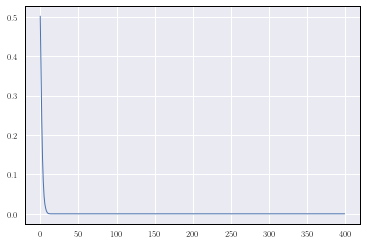

In [79]:

df_one = df2.iloc[1100].rho
df_one
plt.plot(df_one)

In [93]:
rho_exp = 0.
# m, s, b, f, tt = 
get_quasilevel_exp(df_one, rho_exp)

# m - s, m + s, df_one[b]

(1.6275284817484307e-05, 0.00021215436933752263, 9, 400)

In [92]:
get_quasilevel(df_one)

# crossing = get_zero_crossing(df_one - rho_exp)


# crossing

(0.0, 0.0, 200, 400)

In [89]:
rho = df_one

is_correct = False

beg = int(len(rho) / 2)
fin = len(rho)

m = np.mean(rho[beg:fin])
s = np.std(rho[beg:fin])

is_correct_beg = ((m - s < rho[beg]) & ( rho[beg] < m + s ))
is_correct_fin = ((m - s < rho[fin-1]) & ( rho[fin-1] < m + s ))

is_correct = is_correct_beg & is_correct_fin
is_correct

False